# Detect Bank Notes

## Data Collection

We will use [this](https://github.com/bamartin1618/DS_CC_Dataset/blob/main/bank_note_data.csv) dataset for building our model.

It is the first step of any kind of data science project.

In [ ]:
# This command will download the file in google colab.
!wget https://raw.githubusercontent.com/bamartin1618/DS_CC_Dataset/main/bank_note_data.csv

--2023-03-25 17:57:06--  https://raw.githubusercontent.com/bamartin1618/DS_CC_Dataset/main/bank_note_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45088 (44K) [text/plain]
Saving to: ‘bank_note_data.csv’

bank_note_data.csv  100%[===================>]  44.03K  --.-KB/s    in 0.01s   

2023-03-25 17:57:06 (4.32 MB/s) - ‘bank_note_data.csv’ saved [45088/45088]



In [ ]:
from google.colab import drive


# Connects colab to google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "drive/MyDrive/"

 AICamp		        confusion_matrix_vit.png   multimodal	  ouput
'Colab Notebooks'       data			   multimodel	  output
 confusion_matrix.png   models			   optimizer.pt


In [ ]:
import shutil


# Copy the data file downloaded above from colab to desired folder in google drive for later use.
shutil.copy("/content/bank_note_data.csv","drive/MyDrive/AICamp/ds")

'drive/MyDrive/AICamp/ds/bank_note_data.csv'

## Exploratory Data analysis

Once we collect required data, we will need to explore our data in order to know about data quality, distribution, and explore features relevant for our problem. We visualize different characteristics of our data. This process is known as Exploratory data analysis (EDA).

This is the second step in data science project.

In [ ]:
# Import required libraries
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [ ]:
# Read data
file_path = "drive/MyDrive/AICamp/ds/bank_note_data.csv"

data = pd.read_csv(file_path)

In [ ]:
# Review first 5 rows of dataset
data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


From above, we can see that there are five different columns/attributes in our data file. Among them, 4 of them are our probable feature attributes (Image.Var, Image.Skew, Image.Curt, Entropy), while 1 of them is our target variable (Class). The four attributes are our probable features because we donot know if all of them are equally important for our problem our not. This is why we perform EDA and feature analysis to determine what would be relatable features for training our model. By, target variable, I mean the output for our model, or what we like to classify.

In [ ]:
# Get the general summary statistics of our dataset
data.describe()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [ ]:
# Check of any NULL value exists
data.isnull().values.any()

False

In our dataset, there are no NULL values. So, we donot need to do anything.

But, if there is presence of NULL values in our dataset, we will need to handle them gracefully. There are several ways to handle NULL values in the dataset. It depends upon the use case and ditribution of null values. Some useful and simple method used are:
1. Delete row containing null value.
2. If the column/feature containing null value is continues, then use extrapolation techniques such as mean/median/mode to replace NULL values.

In [ ]:
# Check if the dataset is balance or not.
data.groupby(by=["Class"]).count()

,Image.Var,Image.Skew,Image.Curt,Entropy
Class,,,,
0,762,762,762,762
1,610,610,610,610


Looking at above distribution, we can say that the dataset is almost balanced. 

But, it is not always possible to get balanced dataset while solving real world datascience problems. In such scenario, we will need to use different techniques such as sampling/data augmentation in order to create balanced dataset. 

<Axes: xlabel='Image.Curt', ylabel='Entropy'>

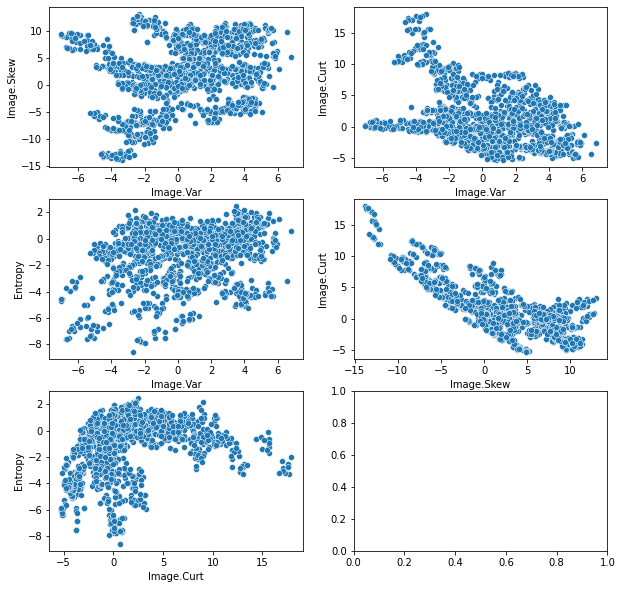

In [ ]:
# Checking how different features are related to each other. We will use
# scatterplot for this.

feature_columns = ["Image.Var", "Image.Skew", "Image.Curt", "Entropy"]

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(10,10))


sns.scatterplot(x=feature_columns[0], y=feature_columns[1], data=data, ax=axs[0][0])
sns.scatterplot(x=feature_columns[0], y=feature_columns[2], data=data, ax=axs[0][1])
sns.scatterplot(x=feature_columns[0], y=feature_columns[3], data=data, ax=axs[1][0])
sns.scatterplot(x=feature_columns[1], y=feature_columns[2], data=data, ax=axs[1][1])
sns.scatterplot(x=feature_columns[2], y=feature_columns[3], data=data, ax=axs[2][0])


<Axes: xlabel='Class', ylabel='Entropy'>

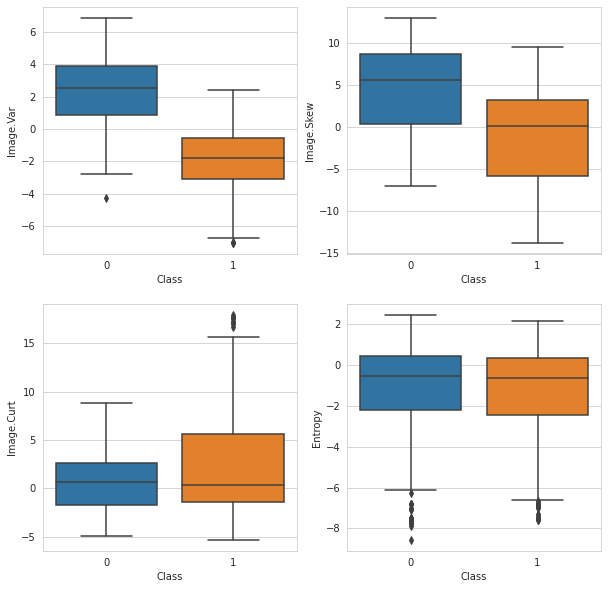

In [ ]:
# Check if any outliers are present. We can use box plot to see that.

feature_columns = ["Image.Var", "Image.Skew", "Image.Curt", "Entropy"]

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10,10))

sns.set_style("whitegrid")
  
sns.boxplot(x = 'Class', y = feature_columns[0], data=data, ax=axs[0][0])
sns.boxplot(x = 'Class', y = feature_columns[1], data=data, ax=axs[0][1])
sns.boxplot(x = 'Class', y = feature_columns[2], data=data, ax=axs[1][0])
sns.boxplot(x = 'Class', y = feature_columns[3], data=data, ax=axs[1][1])

From the above plot, we can see that there are some small diamond shaped data points for features Image.Var, Image.Curt, and Entropy. These datapoints are the outliers as per our visualization. But, we need to carefully see the datapoints by ourselves to make sure if they are actually an outlier or some unusual observation that took place due to some special reasons.

<Axes: xlabel='Entropy', ylabel='Count'>

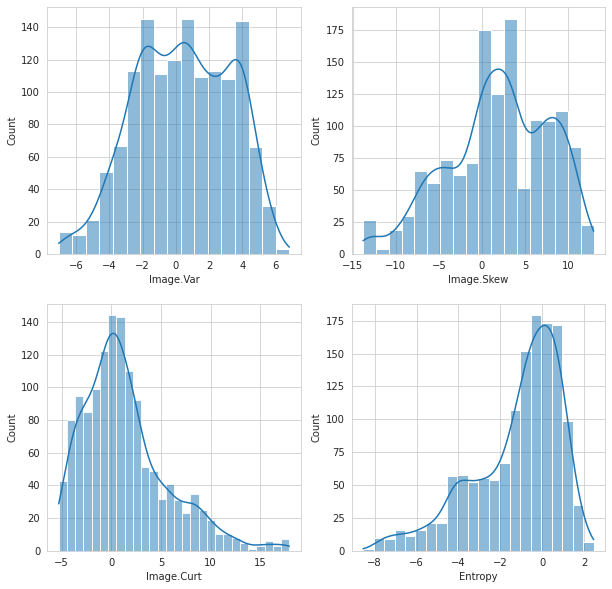

In [ ]:
#create normal distribution curve

feature_columns = ["Image.Var", "Image.Skew", "Image.Curt", "Entropy"]

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10,10))

sns.histplot(x = feature_columns[0], data=data,  kde=True, ax=axs[0][0])
sns.histplot(x = feature_columns[1], data=data,  kde=True, ax=axs[0][1])
sns.histplot(x = feature_columns[2], data=data,  kde=True, ax=axs[1][0])
sns.histplot(x = feature_columns[3], data=data,  kde=True, ax=axs[1][1])

In [ ]:
# Visualize correlation between feature variables.

df = data.drop(labels=["Class"], axis=1)
df_corr = df.corr() # Generate correlation matrix

fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = df_corr.columns,
        y = df_corr.index,
        z = np.array(df_corr)
    )
)
fig.update_layout(title_text='Correlation between feature variables', title_x=0.5)
# Save the figure in interactive html format
fig.write_html("drive/MyDrive/AICamp/ds/correlation.html")

In [ ]:
# Check if any outliers are present. We can use box plot to see that.

feature_columns = ["Image.Var", "Image.Skew", "Image.Curt", "Entropy"]

fig = make_subplots(rows=2, cols=2, horizontal_spacing=0.2)

fig.append_trace(go.Box(x=data["Class"], y=data[feature_columns[0]], name=f"{feature_columns[0]} Vs Class"), row=1, col=1)
fig.append_trace(go.Box(x=data["Class"], y=data[feature_columns[1]], name=f"{feature_columns[1]} Vs Class"), row=1, col=2)
fig.append_trace(go.Box(x=data["Class"], y=data[feature_columns[2]],  name=f"{feature_columns[2]} Vs Class"), row=2, col=1)
fig.append_trace(go.Box(x=data["Class"], y=data[feature_columns[3]],  name=f"{feature_columns[3]} Vs Class"), row=2, col=2)
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default

# Edit axis labels
fig['layout']['xaxis']['title']='Class'
fig['layout']['xaxis2']['title']='Class'
fig['layout']['xaxis3']['title']='Class'
fig['layout']['xaxis4']['title']='Class'
fig['layout']['yaxis']['title']=feature_columns[0]
fig['layout']['yaxis2']['title']=feature_columns[1]
fig['layout']['yaxis3']['title']=feature_columns[2]
fig['layout']['yaxis4']['title']=feature_columns[3]

fig.update_layout(title_text='Boxplot: Features with respect to Class', title_x=0.5)

fig.show()
fig.write_html("drive/MyDrive/AICamp/ds/boxplot.html")

In [ ]:
#create normal distribution curve

feature_columns = ["Image.Var", "Image.Skew", "Image.Curt", "Entropy"]

feature_normalized = []

fig = make_subplots(rows=2, cols=2, horizontal_spacing=0.2)

i=1
for feature in feature_columns:
  class_0_hist = data[data['Class']==0][feature]
  class_1_hist = data[data['Class']==1][feature]
  fig.append_trace(go.Histogram(x=class_0_hist, name=f"{feature_columns[i-1]} Vs Class 0"), row= 1 if i==1 or i==2 else 2, col=1 if i==1 or i==3 else 2)
  fig.append_trace(go.Histogram(x=class_1_hist, name=f"{feature_columns[i-1]} Vs Class 1"), row= 1 if i==1 or i==2 else 2, col=1 if i==1 or i==3 else 2)

  fig['layout']['xaxis' + (str(i) if i>1 else '')]['title']=feature_columns[i-1]
  fig['layout']['yaxis'+ (str(i) if i>1 else '')]['title']='Count'
  i=i+1
fig.update_layout(title_text='Histogram plot: Features with respect to Class', title_x=0.5)
fig.show()
fig.write_html("drive/MyDrive/AICamp/ds/histogram.html")


## Data Pre-processing
Once we explore our data, the next important step is to pre-process our data and make it ready for training our model. In this project, we will use simple pre-processing technique called standardization in order to limit the range of our features within uniform range and avoid any kind of biasness during training. 

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
Y_data = data['Class']
X_data = data.drop(labels=['Class'], axis=1)

In [ ]:
scaler = StandardScaler()

# Fit the data
scaler.fit(X_data)

# Transform the data
X_data_scaler = scaler.transform(X_data)

## Train/Test Split

As we now have our pre-processed data, we will split our dataset into training and testing samples. We will use training samples to train our model while use testing samples to evaluate our model performance. The general rul of thumb if to use 80/20 ratio for splitting data into training and testing samples.

In [ ]:
# Import usefule modules
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data_scaler, Y_data, test_size=0.8, random_state=42)

## Model Building

This is the crucial stage of our project. Based on our use case, we will need to choose which model would be a good fit for solving our problems.

In our case, we want to detect if the bank note falls under class 0 or 1. So, this makes our problem to be formalted as supervised machine learning classification problem. There are several machine learning classification algorithm available. But, based on our data, we will use the following three models for training our dataset and compare the results to choose the best performing one.
1. Logistic Regression
2. SVM Classifier

In [ ]:
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
log_clf = LogisticRegression(random_state=0)
svm_clf = svm.SVC()
mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

## Model Training

In [ ]:
log_clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
svm_clf.fit(X_train, y_train)

SVC()

In [ ]:
mlp_clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

## Model Evaluation

In [ ]:
# Import usefule modules
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay


In [ ]:
y_log_clf = log_clf.predict(X_test)

In [ ]:
y_svm_clf = svm_clf.predict(X_test)

In [ ]:
y_mlp_clf = mlp_clf.predict(X_test)

In [ ]:
log_clf_report = classification_report(y_test, y_log_clf)

In [ ]:
print("Classification Report for Logistic Regression Classifier\n")
print(log_clf_report)

Classification Report for Logistic Regression Classifier

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       619
           1       0.95      0.99      0.97       479

    accuracy                           0.98      1098
   macro avg       0.97      0.98      0.98      1098
weighted avg       0.98      0.98      0.98      1098



In [ ]:
svm_clf_report = classification_report(y_test, y_svm_clf)

In [ ]:
print("Classification Report for SVM Classifier\n")
print(svm_clf_report)

Classification Report for SVM Classifier

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       619
           1       0.98      1.00      0.99       479

    accuracy                           0.99      1098
   macro avg       0.99      0.99      0.99      1098
weighted avg       0.99      0.99      0.99      1098



In [ ]:
mlp_clf_report = classification_report(y_test, y_mlp_clf)

In [ ]:
print("Classification Report for MLP Classifier\n")
print(mlp_clf_report)

Classification Report for MLP Classifier

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       619
           1       0.99      0.96      0.97       479

    accuracy                           0.98      1098
   macro avg       0.98      0.98      0.98      1098
weighted avg       0.98      0.98      0.98      1098



Based on the above classification report, SVM classifier outperforms other models as it has maximum accuracy (99%) and F1-score (99%). So, we will using this model for our classification problem.

In [ ]:
log_clf_cm = confusion_matrix(y_test, y_log_clf)

In [ ]:
svm_clf_cm = confusion_matrix(y_test, y_svm_clf)

In [ ]:
mlp_clf_cm = confusion_matrix(y_test, y_mlp_clf)

## Model Evaluation: Visualization

[Text(0.5, 1.0, 'MLP Classifier')]

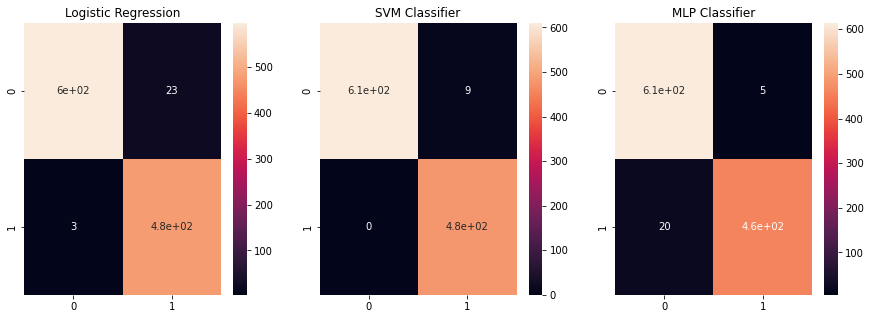

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(15,5))

sns.heatmap(log_clf_cm, annot=True, ax=axs[0]).set(title='Logistic Regression')
sns.heatmap(svm_clf_cm, annot=True, ax=axs[1]).set(title='SVM Classifier')
sns.heatmap(mlp_clf_cm, annot=True, ax=axs[2]).set(title='MLP Classifier')

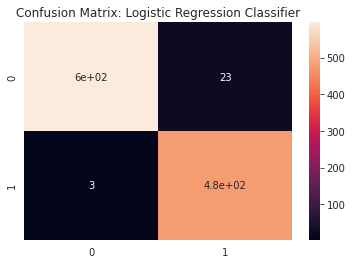

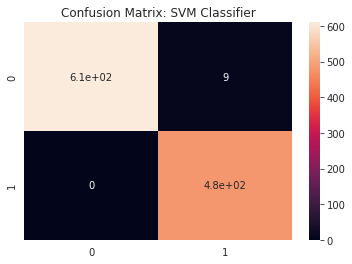

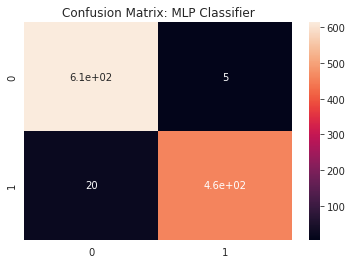

In [ ]:
classifiers = ["Logistic Regression Classifier", "SVM Classifier", "MLP Classifier"]
cms = [log_clf_cm, svm_clf_cm, mlp_clf_cm]
for classifier in classifiers:
    plt.title(f'Confusion Matrix: {classifier}')
    plt.ylabel('True Labels')
    plt.xlabel('Predicted_labels')
    sns.heatmap(cms[classifiers.index(classifier)], annot=True)
    plt.savefig(f"drive/MyDrive/AICamp/ds/{classifier}.png")
    plt.show()


In [ ]:
x = ['0', '1']
y =  ['0', '1']

classifiers = ["Logistic Regression Classifier", "SVM Classifier", "MLP Classifier"]
cms = [log_clf_cm, svm_clf_cm, mlp_clf_cm]
for classifier in classifiers:
    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in cms[classifiers.index(classifier)]]

    # set up figure 
    fig = ff.create_annotated_heatmap(cms[classifiers.index(classifier)], x=x, y=y, annotation_text=z_text, colorscale='Viridis')

    # add title
    fig.update_layout(title_text=f'<i><b>Confusion matrix: {classifier}</b></i>',
                      #xaxis = dict(title='x'),
                      #yaxis = dict(title='x')
                      title_x=0.5
                    )

    # add custom xaxis title
    fig.add_annotation(dict(font=dict(color="black",size=14),
                            x=0.5,
                            y=-0.15,
                            showarrow=False,
                            text="Predicted value",
                            xref="paper",
                            yref="paper"))

    # add custom yaxis title
    fig.add_annotation(dict(font=dict(color="black",size=14),
                            x=-0.35,
                            y=0.5,
                            showarrow=False,
                            text="Real value",
                            textangle=-90,
                            xref="paper",
                            yref="paper"))

    # adjust margins to make room for yaxis title
    fig.update_layout(margin=dict(t=50, l=200))

    # add colorbar
    fig['data'][0]['showscale'] = True
    fig.show()
    fig.write_html(f"drive/MyDrive/AICamp/ds/cm_{classifier}.html")

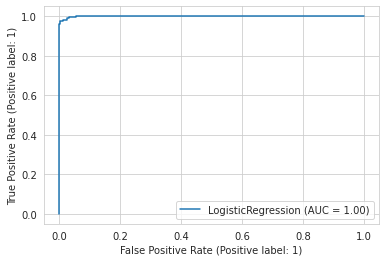

In [ ]:
# ROC Curve
svc_disp = RocCurveDisplay.from_estimator(log_clf, X_test, y_test)
plt.savefig("drive/MyDrive/AICamp/ds/Logistic_Reg_AUC.png")

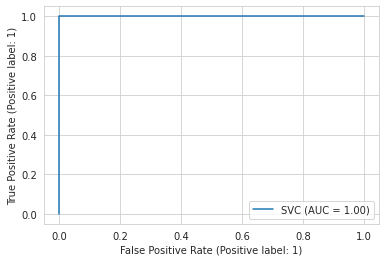

In [ ]:
svc_disp = RocCurveDisplay.from_estimator(svm_clf, X_test, y_test)
plt.savefig("drive/MyDrive/AICamp/ds/SVM_clf_AUC.png")

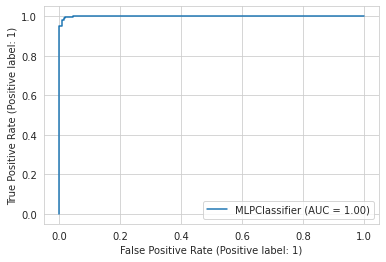

In [ ]:
svc_disp = RocCurveDisplay.from_estimator(mlp_clf, X_test, y_test)
plt.savefig("drive/MyDrive/AICamp/ds/MLP_clf_AUC.png")